In [2]:
import numpy as np
import importlib
import hopfieldNetwork as hn
import matplotlib.pyplot as plt
import matplotlib

In [3]:
importlib.reload(hn)

<module 'hopfieldNetwork' from 'c:\\Users\\User\\Desktop\\KTH\\ANN\\lab 2\\ann_lab1\\lab3\\hopfieldNetwork.py'>

In [4]:
N2 = 1024
log2N2 = int(np.log2(N2))
pictures_patterns = np.loadtxt('pict.dat', delimiter=',')
pictures_patterns = pictures_patterns.reshape((11, 1024))
pictures_patterns.shape

(11, 1024)

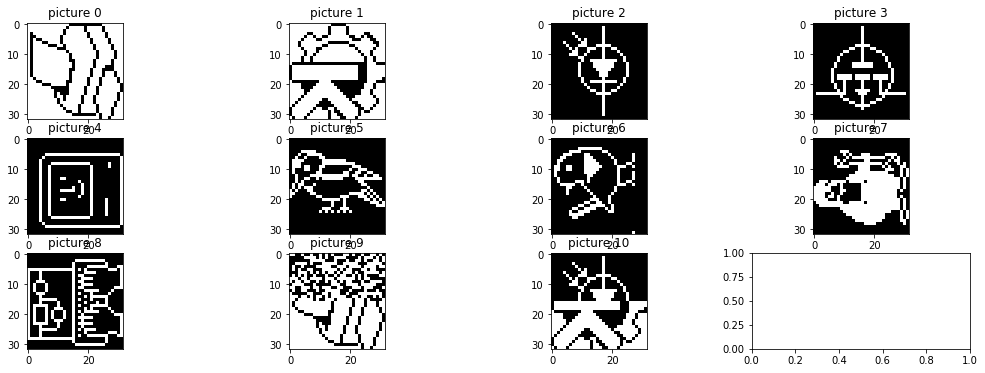

In [5]:
pictures = pictures_patterns.reshape((11, 32, 32))
fig, ax = plt.subplots(3, 4, figsize=(18,6))
for i, pic in enumerate(pictures):
    ax[i//4, i%4].imshow(pic, cmap="binary")
    ax[i//4, i%4].set_title(f"picture {i}")

In [6]:
importlib.reload(hn)
hop_net2 = hn.HopfieldNetwork(pictures_patterns[:3,:])
hop_net2.check_storage()

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 1!
[-1. -1. -1. ... -1. -1. -1.] 

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 2!
[1. 1. 1. ... 1. 1. 1.] 

